In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("data/prediction.csv")

In [4]:
df

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,Relevant Text,gender,equality,women,education,girls,...,gap,rights,female,schooling,educational,Years with Highest Keyword Count,Years with Most Positive Sentiment,Parity_Indicator_Code,Country Code,Parity_Value
0,AFG,1971,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Primary,AFG,0.165
1,AFG,1971,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Secondary,AFG,0.146
2,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Primary,AFG,0.168
3,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Secondary,AFG,0.132
4,AFG,1972,0,-1.000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2017],[2010],Tertiary,AFG,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16894,ZWE,2019,6,0.125,Embedded in our aspirations is a strong sense ...,0.000000,0.0,0.028102,0.164138,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2022],[2021],Primary,ZWE,0.999
16895,ZWE,2019,6,0.125,Embedded in our aspirations is a strong sense ...,0.000000,0.0,0.028102,0.164138,0.000000,...,0.0,0.000000,0.0,0.0,0.0,[2022],[2021],Tertiary,ZWE,0.961
16896,ZWE,2020,5,0.142,"Your Excellencies, As we celebrate the 25th An...",0.118654,0.0,0.177635,0.000000,0.071262,...,0.0,0.053283,0.0,0.0,0.0,[2022],[2021],Primary,ZWE,1.005
16897,ZWE,2020,5,0.142,"Your Excellencies, As we celebrate the 25th An...",0.118654,0.0,0.177635,0.000000,0.071262,...,0.0,0.053283,0.0,0.0,0.0,[2022],[2021],Tertiary,ZWE,0.962


In [5]:
df["Parity_Indicator_Code"].value_counts()

Parity_Indicator_Code
Primary      6660
Secondary    5390
Tertiary     4849
Name: count, dtype: int64

In [6]:
# tertiary data is quite sparse
df[df["Parity_Indicator_Code"] == "Tertiary"][["ISO-alpha3 Code", "Year"]].value_counts("Year").sort_values(ascending=True)

Year
2023      7
1970     13
1997     63
1981     67
1989     67
1973     68
1976     68
1988     68
1990     69
1991     70
1975     71
1978     71
1985     71
1974     72
2022     73
1982     73
1998     74
1992     74
1984     74
1983     74
1977     74
1986     75
1987     75
1979     76
1971     76
1972     78
1995     78
1980     79
1993     79
1996     80
1994     80
2000     98
2001     99
2007    103
1999    104
2005    107
2003    111
2008    111
2006    111
2021    112
2004    113
2002    114
2009    118
2010    120
2013    124
2019    125
2020    125
2014    126
2011    127
2012    130
2017    131
2018    132
2016    133
2015    138
Name: count, dtype: int64

In [7]:
primary_df = df[df["Parity_Indicator_Code"] == "Primary"]

In [8]:
primary_df.reset_index(drop=True, inplace=True)
primary_df.value_counts("Year").sort_values(ascending=True)

Year
2022      4
1970     17
2021     66
1973     91
1971     92
1975     95
1972    100
1974    100
1976    106
1985    106
1980    107
1979    108
1990    110
1989    111
1997    111
1977    111
1982    111
1981    112
1987    112
1988    113
1983    114
1984    114
1978    114
1986    120
1996    124
1991    126
1992    130
1995    130
1998    131
2020    134
1993    134
1994    135
2000    145
2019    149
2003    151
2010    151
2001    153
2018    153
1999    154
2006    154
2013    154
2005    156
2009    157
2004    157
2002    158
2008    158
2014    159
2016    159
2017    159
2015    160
2007    161
2011    161
2012    162
Name: count, dtype: int64

In [9]:
# drop columns based on no relevancy or potential future information -> at point of prediction, take 1990, the model shouldnt and cant know that 2017 was the highest sentiment score
primary_df = primary_df.drop(columns=["Relevant Text", "Years with Highest Keyword Count", "Years with Most Positive Sentiment", "Parity_Indicator_Code", "Country Code"])

In [10]:
# drop years 1970, 2021 and 2022 as only few data points are available
primary_df[~primary_df["Year"].isin([1970, 2021, 2022])]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.165
1,AFG,1972,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.168
2,AFG,1973,1,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.176
3,AFG,1974,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.175
4,AFG,1975,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,ZWE,2016,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.983
6655,ZWE,2017,0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.992
6656,ZWE,2018,3,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997
6657,ZWE,2019,6,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.999


In [11]:
countries = pd.DataFrame(data={"ISO-alpha3 Code": primary_df["ISO-alpha3 Code"].unique()})

In [12]:
df_base_year = pd.DataFrame(data={"Year": np.arange(1971, 2021)})

In [13]:
cross = pd.merge(countries, df_base_year, how="cross")
cross

,ISO-alpha3 Code,Year
0,AFG,1971
1,AFG,1972
2,AFG,1973
3,AFG,1974
4,AFG,1975
...,...,...
9545,ZWE,2016
9546,ZWE,2017
9547,ZWE,2018
9548,ZWE,2019


In [14]:
# add missing years for all countries
all_years = pd.merge(cross, primary_df, on=["Year", "ISO-alpha3 Code"], how="left")

In [15]:
# noticed that some years are missing -> checked by creating dataframe with all combinations of years and countries and left joining that to the original (primary_df) dataframe to check for na values
nas = all_years[all_years["Keyword Count"].isna()]["ISO-alpha3 Code"].value_counts()

In [16]:
na_list = list(nas[nas > 10].index)

In [17]:
len(na_list)

106

In [18]:
all_years[all_years["ISO-alpha3 Code"] == "DEU"]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
2100,DEU,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,DEU,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,DEU,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,DEU,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104,DEU,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,DEU,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,DEU,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2107,DEU,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,DEU,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109,DEU,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Sort the dataframe by 'ISO-alpha3 Code' and 'Year'
all_years = all_years.sort_values(by=['ISO-alpha3 Code', 'Year'])
all_years

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.165
1,AFG,1972,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.168
2,AFG,1973,1.0,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.176
3,AFG,1974,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.175
4,AFG,1975,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.983
9546,ZWE,2017,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.992
9547,ZWE,2018,3.0,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997
9548,ZWE,2019,6.0,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.999


In [21]:
all_years['Parity_Change'] = all_years.groupby('ISO-alpha3 Code')['Parity_Value'].diff()
all_years.dropna(subset=['Parity_Change'], inplace=True)

In [40]:
all_years

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value,Parity_Change
1,AFG,1972,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.168,0.003
2,AFG,1973,1.0,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.176,0.008
3,AFG,1974,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.175,-0.001
4,AFG,1975,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.183,0.008
5,AFG,1976,2.0,0.177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.117326,0.0,0.0,0.0,0.189,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.983,0.003
9546,ZWE,2017,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.992,0.009
9547,ZWE,2018,3.0,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997,0.005
9548,ZWE,2019,6.0,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.999,0.002


In [28]:
x = all_years.drop(columns=["Parity_Change", "Parity_Value"])
x

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,access,parity,balance,equity,discrimination,gap,rights,female,schooling,educational
1,AFG,1972,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,AFG,1973,1.0,0.273,0.000000,0.000000,0.099189,0.000000,0.000000,0.212404,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,AFG,1974,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,AFG,1975,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
5,AFG,1976,2.0,0.177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102,0.0,0.0,0.000000,0.0,0.117326,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
9546,ZWE,2017,0.0,-1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
9547,ZWE,2018,3.0,0.102,0.094684,0.099719,0.056700,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
9548,ZWE,2019,6.0,0.125,0.000000,0.000000,0.028102,0.164138,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [34]:
y_change = all_years["Parity_Change"]

In [35]:
y_val = all_years["Parity_changeue"]

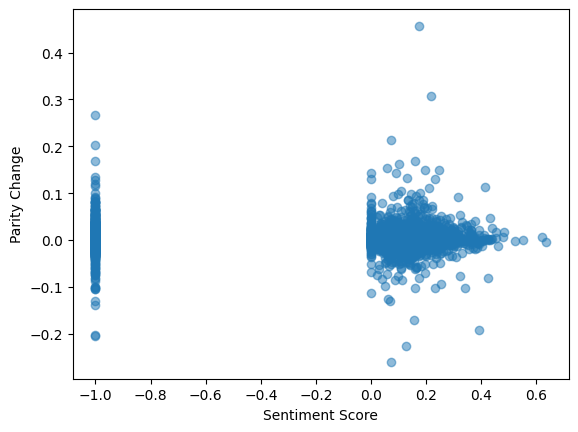

In [37]:
plt.scatter(x["Sentiment Score"], y_change, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Change")
plt.show()

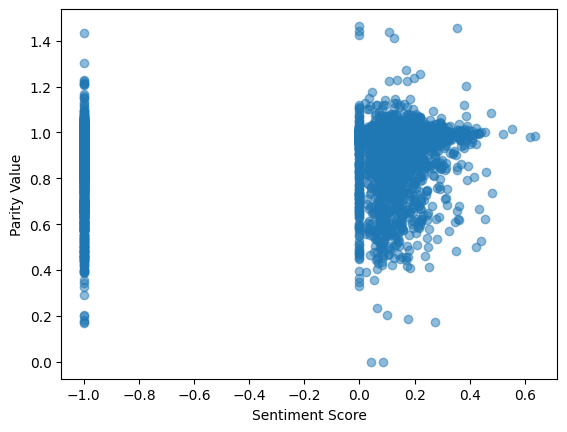

In [38]:
plt.scatter(x["Sentiment Score"], y_change, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Value")
plt.show()

In [41]:
x_test = all_years[all_years["Year"] >= 2015].drop(["Parity_Change", "Parity_Value"], axis=1)
x_train = all_years[all_years["Year"] < 2015].drop(["Parity_Change", "Parity_Value"], axis=1)


In [56]:
y_test_val = all_years[all_years["Year"] >= 2015]["Parity_Value"]
y_train_val = all_years[all_years["Year"] < 2015]["Parity_Value"]

y_test_change = all_years[all_years["Year"] >= 2015]["Parity_Change"]
y_train_change = all_years[all_years["Year"] < 2015]["Parity_Change"]

y_test_change = y_test_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
y_train_changecat = y_train_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


# One Hot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_train = encoder.fit_transform(x_train[['ISO-alpha3 Code']]).toarray()
encoded_test = encoder.transform(x_test[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
x_train = x_train.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_test = x_test.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_train = pd.concat([x_train, encoded_train_df], axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)


KeyError: "None of [Index(['ISO-alpha3 Code'], dtype='object')] are in the [columns]"

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train_changecat)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train_changecat)

# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(x_test)

# Predict using Naive Bayes
y_pred_nb = nb.predict(x_test)

# Evaluate performance
accuracy_log_reg = accuracy_score(y_test_change, y_pred_log_reg)
accuracy_nb = accuracy_score(y_test_change, y_pred_nb)

print(f"Accuracy for Logistic Regression: {accuracy_log_reg}")
print(f"Accuracy for Naive Bayes: {accuracy_nb}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_change, y_pred_log_reg))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_change, y_pred_nb))

Accuracy for Logistic Regression: 0.4831591173054588
Accuracy for Naive Bayes: 0.2218350754936121

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.31      0.34       326
           1       0.00      0.00      0.00        76
           2       0.53      0.69      0.60       459

    accuracy                           0.48       861
   macro avg       0.30      0.33      0.31       861
weighted avg       0.43      0.48      0.45       861


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.45      0.20      0.28       326
           1       0.09      0.70      0.16        76
           2       0.50      0.16      0.24       459

    accuracy                           0.22       861
   macro avg       0.35      0.35      0.23       861
weighted avg       0.45      0.22      0.25       861



c:\Users\Jan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Train Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train_val)

# Train Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train_val)

# Train Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train_val)

RandomForestRegressor()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Linear Regression
y_pred_linear = linear_reg.predict(x_test)

# Predict using Decision Tree Regressor
y_pred_tree = tree_reg.predict(x_test)

# Predict using Random Forest Regressor
y_pred_forest = forest_reg.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test_val, y_pred_linear)
mse_tree = mean_squared_error(y_test_val, y_pred_tree)
mse_forest = mean_squared_error(y_test_val, y_pred_forest)

print(f"Mean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Decision Tree Regressor: {mse_tree}")
print(f"Mean Squared Error for Random Forest Regressor: {mse_forest}")

# Calculate R^2 score for each model
r2_linear = r2_score(y_test_val, y_pred_linear)
r2_tree = r2_score(y_test_val, y_pred_tree)
r2_forest = r2_score(y_test_val, y_pred_forest)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Decision Tree Regressor: {r2_tree}")
print(f"R^2 Score for Random Forest Regressor: {r2_forest}")

Mean Squared Error for Linear Regression: 5.329307915636414e+16
Mean Squared Error for Decision Tree Regressor: 0.0012822206736353072
Mean Squared Error for Random Forest Regressor: 0.0007941442825783974
R^2 Score for Linear Regression: -2.1313188613735137e+19
R^2 Score for Decision Tree Regressor: 0.48720900548009816
R^2 Score for Random Forest Regressor: 0.6824025342680632


In [54]:
# Train Linear Regression
linear_reg_change = LinearRegression()
linear_reg_change.fit(x_train, y_train_change)

# Train Decision Tree Regressor
tree_reg_change = DecisionTreeRegressor()
tree_reg_change.fit(x_train, y_train_change)

# Train Random Forest Regressor
forest_reg_change = RandomForestRegressor()
forest_reg_change.fit(x_train, y_train_change)

RandomForestRegressor()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Linear Regression
y_pred_linear = linear_reg_change.predict(x_test)

# Predict using Decision Tree Regressor
y_pred_tree = tree_reg_change.predict(x_test)

# Predict using Random Forest Regressor
y_pred_forest = forest_reg_change.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test_change, y_pred_linear)
mse_tree = mean_squared_error(y_test_change, y_pred_tree)
mse_forest = mean_squared_error(y_test_change, y_pred_forest)

print(f"Mean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Decision Tree Regressor: {mse_tree}")
print(f"Mean Squared Error for Random Forest Regressor: {mse_forest}")

# Calculate R^2 score for each model
r2_linear = r2_score(y_test_change, y_pred_linear)
r2_tree = r2_score(y_test_change, y_pred_tree)
r2_forest = r2_score(y_test_change, y_pred_forest)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Decision Tree Regressor: {r2_tree}")
print(f"R^2 Score for Random Forest Regressor: {r2_forest}")

Mean Squared Error for Linear Regression: 9853726199939358.0
Mean Squared Error for Decision Tree Regressor: 0.0013296295005807205
Mean Squared Error for Random Forest Regressor: 0.0003471936570267132
R^2 Score for Linear Regression: -5.580501703503865e+19
R^2 Score for Decision Tree Regressor: -6.530146000063779
R^2 Score for Random Forest Regressor: -0.9662762646025553
